# 챗GPT 활용하여 네이버 뉴스 크롤링하기
- 참고 유튜브 [김왼손의 왼손코딩](https://youtu.be/zLAeXWexWoM?feature=shared)

# 네이버 뉴스 경제에 있는 헤드라인 제목을 수집하자.
- 사용법이 쉬운 파이썬 패키지 3개를 장단점과 함께 소개해 달라고 요청함

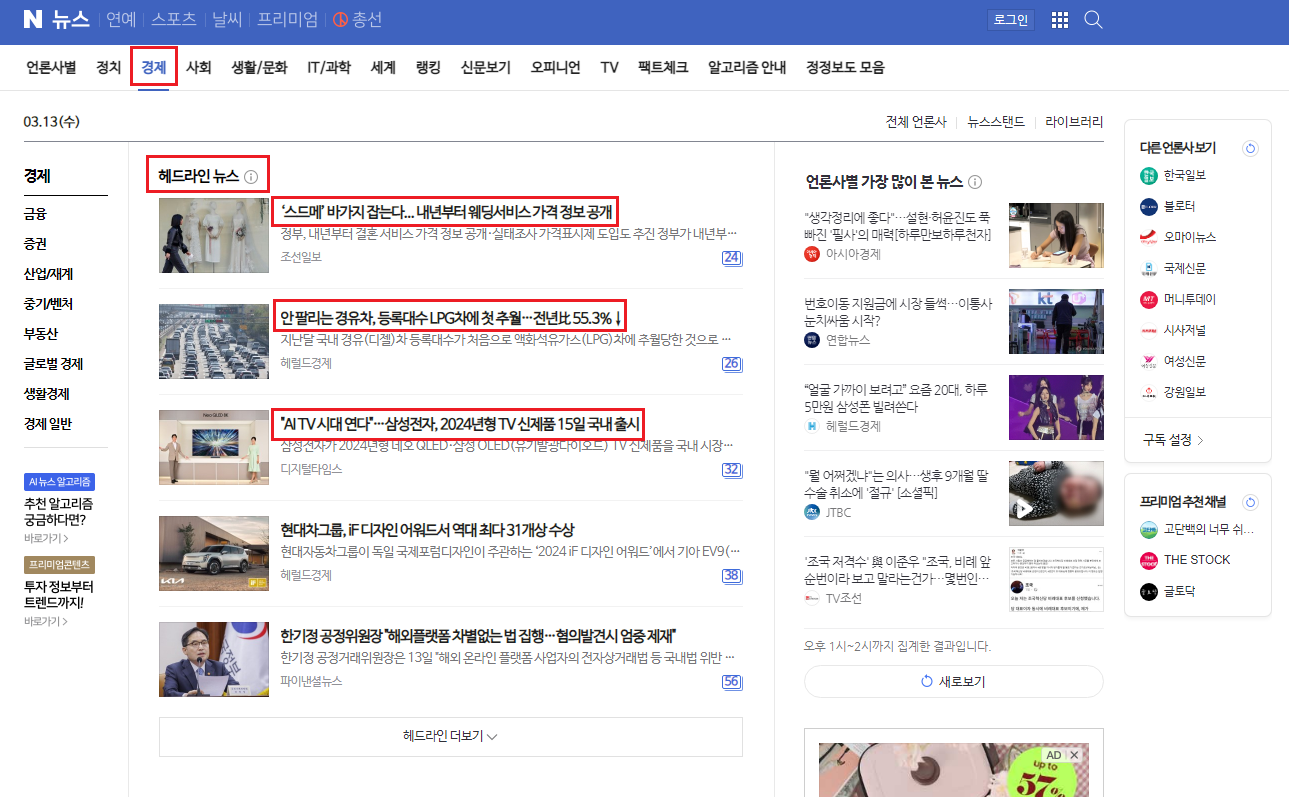

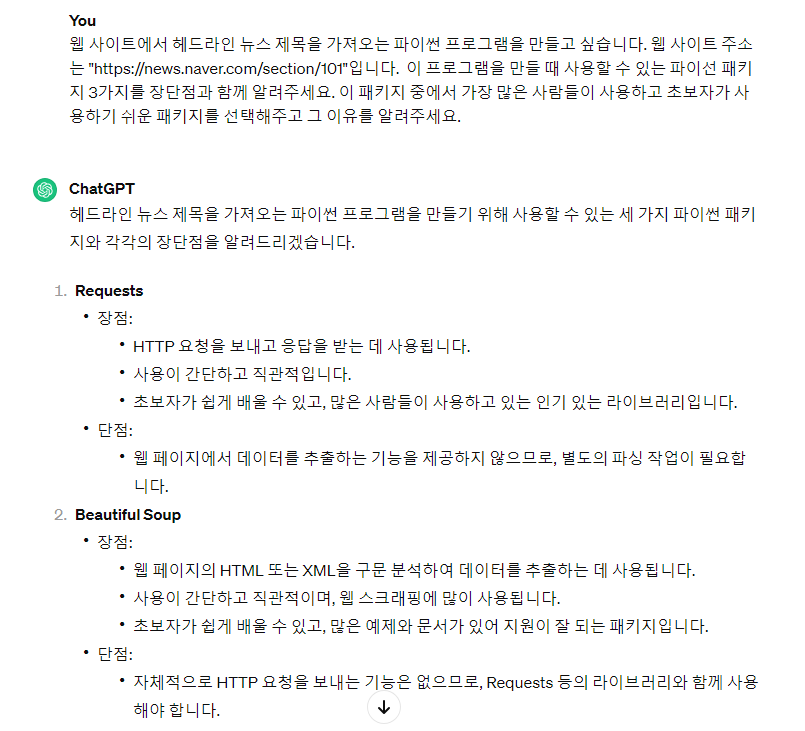

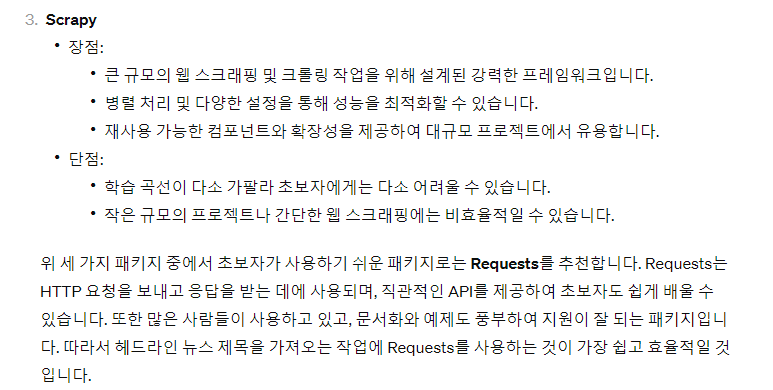

In [1]:
# 나는 requests 추천 받고 왼손 코딩은 Beautiful Soup 추천이 나옴
# 강좌대로 Beautiful Soup으로 알려달라고 챗GPT에게 물어볼거임

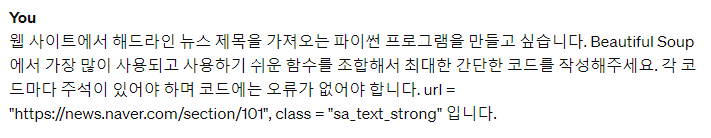

In [2]:
import requests  # 웹 페이지 요청을 위한 라이브러리
from bs4 import BeautifulSoup  # HTML 파싱을 위한 라이브러리

def get_headline_news(url, target_class):
    # HTTP GET 요청을 보내서 웹 페이지 가져오기
    response = requests.get(url)

    # 응답 받은 데이터를 파싱하기
    soup = BeautifulSoup(response.text, 'html.parser')

    # 헤드라인 뉴스 제목을 담을 리스트 초기화
    headlines = []

    # 웹 페이지에서 해당 클래스를 가진 모든 요소를 찾기
    headline_elements = soup.find_all(class_=target_class)

    # 헤드라인 뉴스 제목이 포함된 HTML 요소가 없는 경우를 대비하여 처리
    if headline_elements:
        # 각 요소에서 텍스트 추출하여 리스트에 추가하기
        for element in headline_elements:
            headlines.append(element.get_text())

    return headlines

# 검색할 웹 사이트 URL
url = "https://news.naver.com/section/101"
# 검색할 클래스
target_class = "sa_text_strong"

# 헤드라인 뉴스 제목 가져오기
headlines = get_headline_news(url, target_class)

# 가져온 헤드라인 뉴스 제목 출력하기
if headlines:
    print("헤드라인 뉴스 제목:")
    for idx, headline in enumerate(headlines, 1):
        print(f"{idx}. {headline}")
else:
    print("헤드라인 뉴스 제목을 가져올 수 없습니다.")


헤드라인 뉴스 제목:
1. "편의점서 유전자 검사를"…마크로젠 '젠톡', GS25 입점
2. '급성장' 알리·테무, 소비자 피해주면 이제 국내법 적용
3. "특별히 알려 드릴게" 노후자금도 다 털렸다…500명 속은 기획부동산
4. 2월 취업자 수 1년 전보다 32만 9천 명 증가
5. 루닛 "뉴질랜드 의료 AI기업 인수 법원 승인…5월 완료 목표"
6. 760억 여객터미널 설계권 걸린 가덕도신공항 설계공모 착수
7. 삼성 "초대형 OLED, LG 앞서…혁신 제품 국내에 가장 먼저 도입"
8. 조 단위 ELS 배상안에도…'밸류업' 기대감에 KB금융·신한지주 '신고가'
9. 이마트, 제철 신선 먹거리 최대 50% 할인
10. “K-반도체가 뜬다” 외국인 주식 투자 순유입, 10년만에 최대[머니뭐니]
11. 고용률 ‘최고’라지만… 그저 쉬고, 구직 단념한 ‘30대’는 계속 는다
12. 삼성전자 "HBM에 SK하닉 기술 도입 보도, 사실 아냐"
13. 청약통장 4,000개 접수… '송도자이풍경채 그라노블' 선방 평가 이어지는 이유는?
14. 내 집인데도 못 들어간 김포 아파트…높이 69㎝ 깎고 준공 승인 받았다
15. “앞길 창창한 청년, 200만원에 발목 잡혀서야”…통신비까지 통합 채무조정 추진
16. 내일부터 휴대전화 통신사 바꾸면 전환지원금 최대 50만원 지급
17. "공매도 반대" 성토한 개미들…금감원 "무리하게 재개 안 할 것"
18. "우주항공청 신설·초소형 위성 사업 본격화…제노코, 수혜 전망"
19. 초록뱀미디어 경영권 매각 속도···티저레터 배포
20. “빨래 건조 용량 키우고 가격은 내렸다”...LG가 선보인 세탁건조기 ‘끝판왕’은
21. “인공지능 시대 증권사는 ‘AI증권사’로 탈바꿈 필요···매수·매도 의견낼 수 있어야”
22. '위기 맞은 8K TV 시장'... AI로 개척나선 삼성
23. "세상 바꿀 인재 모셔야"…삼성전자 새로 합류한 임원들 보니
24. 세입자 6년 이상 임차하는 민간주택
25. LH에 토지비 다 안내도 아파트 착공
26. 

## 제목과 내용을 같이 가져오는 코드를 요청해보자

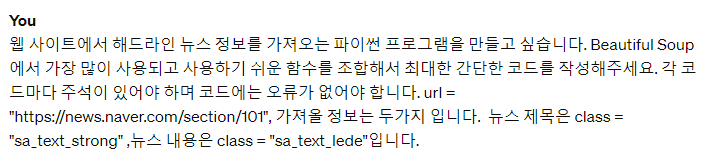

In [3]:
import requests
from bs4 import BeautifulSoup

def get_news_info(url):
    # HTTP GET 요청을 보내서 웹 페이지 가져오기
    response = requests.get(url)

    # 응답 받은 데이터를 파싱하기
    soup = BeautifulSoup(response.text, 'html.parser')

    # 뉴스 제목 가져오기
    news_titles = []
    for title in soup.find_all(class_='sa_text_strong'):
        news_titles.append(title.get_text().strip())

    # 뉴스 내용 가져오기
    news_contents = []
    for content in soup.find_all(class_='sa_text_lede'):
        news_contents.append(content.get_text().strip())

    return news_titles, news_contents

# 뉴스 제목과 내용을 가져올 웹 사이트 URL
url = "https://news.naver.com/section/101"

# 뉴스 정보 가져오기
news_titles, news_contents = get_news_info(url)

# 가져온 뉴스 정보 출력하기
print("===== 뉴스 제목 =====")
for title in news_titles:
    print(title)

print("\n===== 뉴스 내용 =====")
for content in news_contents:
    print(content)


===== 뉴스 제목 =====
“홍콩ELS 배상 기준안 다시 짜라…DLF 때보다 훨씬 후퇴”…지적 나선 민주당
연 7% 이상 대출받은 소상공인, 5.5%로 갈아탄다
‘가덕도신공항’ 여객터미널 국제설계공모 착수…6월 당선작 발표
현대차그룹, 세계 3대 디자인상 iF 어워드 석권...역대 최다 수상
"도요타자동차, 2월 아태 지역 공매도 주식 1위"
비트코인 급상승에 엘살바도르 '대박'..."추정 수익 1천억 원"
“청년희망적금 20兆 풀렸다”… 은행 수신 한 달새 32.4兆 쑥
LG이노텍, 'CDP 기후대응 평가'서 최우수 등급 획득
외국인, 2월에만 韓주식 81억달러 샀다...10년 5개월래 최대↑
비싸도 너무 비싼 사과…도매가 2배 뛰어 ‘사상 최고치’
KB금융, ELS 배상액 최소 1조 예상되는데 주가는 '신고가'…왜?
최수연호 네이버, 3년차도 최대실적 릴레이 이어간다...조직 안정·해외 공략 성과
한 편 제작에 500억원?… 성장 가도 K드라마 제작 ‘뚝’
고용률 ‘최고’라지만… 그저 쉬고, 구직 단념한 ‘30대’는 계속 는다
약세장 예언자 그랜섬 “AI 관련주 투기 거품 가득…미국 주식 어느 때보다 위험”
삼성전자 "HBM에 SK하닉 기술 도입 보도, 사실 아냐"
150배 알박기 탈세혐의자 등 96명 세무조사…국세청 계획은
청약통장 4,000개 접수… '송도자이풍경채 그라노블' 선방 평가 이어지는 이유는?
내 집인데도 못 들어간 김포 아파트…높이 69㎝ 깎고 준공 승인 받았다
“앞길 창창한 청년, 200만원에 발목 잡혀서야”…통신비까지 통합 채무조정 추진
내일부터 휴대전화 통신사 바꾸면 전환지원금 최대 50만원 지급
"공매도 반대" 성토한 개미들…금감원 "무리하게 재개 안 할 것"
내부통제 혁신한다더니… 은행사고 반복, 내달부터 고삐 더 죈다
"우주항공청 신설·초소형 위성 사업 본격화…제노코, 수혜 전망"
여성리더 육성 외치지만… 신한 女CEO 낼 때, 우리는 ‘잠정폐지’
초록뱀미디어 경영권 매각 속도···티저레터 배포
“빨래 건조 용량 키우고 가격

In [ ]:
# 음..... 뭔가 질문을 잘 못한것 같다 ㅋㅋㅋㅋ
# 다시 질문 ㄱㄱ

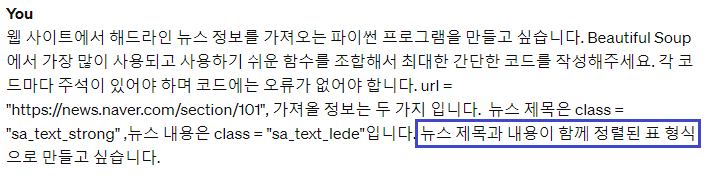

In [4]:
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate

def get_news_info(url):
    # HTTP GET 요청을 보내서 웹 페이지 가져오기
    response = requests.get(url)

    # 응답 받은 데이터를 파싱하기
    soup = BeautifulSoup(response.text, 'html.parser')

    # 뉴스 제목과 내용 가져오기
    news_info = []
    for title, content in zip(soup.find_all(class_='sa_text_strong'), soup.find_all(class_='sa_text_lede')):
        news_info.append([title.get_text().strip(), content.get_text().strip()])

    return news_info

# 뉴스 제목과 내용을 가져올 웹 사이트 URL
url = "https://news.naver.com/section/101"

# 뉴스 정보 가져오기
news_info = get_news_info(url)

# 가져온 뉴스 정보를 표 형식으로 출력하기
print(tabulate(news_info, headers=['뉴스 제목', '뉴스 내용'], tablefmt='grid'))

#  get_news_info 함수를 사용하여 URL에서 HTML을 가져와 BeautifulSoup을 사용하여 파싱한 후,
#  뉴스 제목과 내용을 추출하여 리스트에 저장합니다.
#  마지막으로, tabulate 함수를 사용하여 표 형식으로 출력

+---------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| 뉴스 제목                                                                       | 뉴스 내용                                                                                                                                                                                                           |
+=================================================================================+=====================================================================================================================================================================================================================+
| 비트코인 급상승에 엘살바도르 '대박'..."추정 수익 1천억 원"                      | 가상화폐 비트코인 가격의 무서운 상승세에 세계 최초로 비트코인을 법정통화로 채택한 중미 엘살바

In [ ]:
# 표는 표 맞는데 ㅋㅋㅋㅋㅋㅋ
# 나는 이게 아니라규 ㅋㅋㅋㅋㅋㅋ
# 판다스라는걸 언급을 해야하나......???????

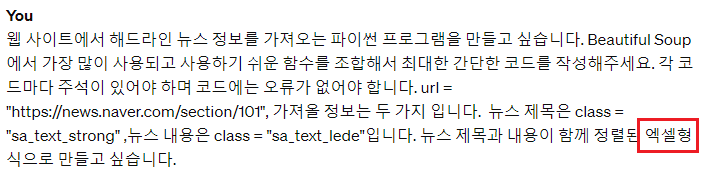

**엑셀형식** 으로 언급함ㅋㅋㅋ

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_news_info(url):
    # HTTP GET 요청을 보내서 웹 페이지 가져오기
    response = requests.get(url)

    # 응답 받은 데이터를 파싱하기
    soup = BeautifulSoup(response.text, 'html.parser')

    # 뉴스 제목과 내용 가져오기
    news_info = []
    for title, content in zip(soup.find_all(class_='sa_text_strong'), soup.find_all(class_='sa_text_lede')):
        news_info.append([title.get_text().strip(), content.get_text().strip()])

    return news_info

# 뉴스 제목과 내용을 가져올 웹 사이트 URL
url = "https://news.naver.com/section/101"

# 뉴스 정보 가져오기
news_info = get_news_info(url)

# 가져온 뉴스 정보를 DataFrame으로 변환하기
df = pd.DataFrame(news_info, columns=['뉴스 제목', '뉴스 내용'])
df

# # DataFrame을 엑셀 파일로 저장하기
# df.to_excel("news_info.xlsx", index=False)

# print("뉴스 정보가 news_info.xlsx 파일로 저장되었습니다.")


#  get_news_info 함수를 사용하여 URL에서 HTML을 가져와 BeautifulSoup을 사용하여 파싱한 후,
#  뉴스 제목과 내용을 추출하여 리스트에 저장합니다.
#  그 다음, pandas 라이브러리를 사용하여 리스트를 DataFrame으로 변환하고, DataFrame을 엑셀 파일로 저장

,뉴스 제목,뉴스 내용
0,"ELS배상 고민 빠진 은행 ""1.7조~2.2조 내놓을 듯""","국민銀 5400억으로 최대 추정 은행들, 배임 문제 직면 우려 김주현 ""그럴 가능성..."
1,투자자·증권사 공매도 토론…이복현 “오해와 의혹 해소해야”,"금융감독원이 개인투자자, 증권사·운용사 등과 함께 공매도를 주제로 토론회를 개최한다..."
2,비트코인 시가총액 전체 8위로 올라서…'은' 넘겼다,비트코인의 시가총액이 대표적 귀금속인 은의 시가총액을 추월한 것으로 알려졌습니다. ...
3,비싸도 너무 비싼 사과…도매가 2배 뛰어 ‘사상 최고치’,과일값이 고공행진 중인 가운데 사과 도매가격이 올해 들어 사상 처음으로 10㎏당 9...
4,"SK바이오팜, CDP '탄소경영 섹터 아너스' 수상",SK바이오팜은 13일 여의도 소재 글래드 호텔에서 개최된 2023 CDP Korea...
5,"국토부 ""부동산거래시스템 일부 오류 정정""",국토교통부가 부동산거래관리시스템의 일부 오류를 정정해 공개 중이라고 밝혔다. 국토부...
6,다시 돌아온 정치테마주…'이정재' 엮이면 상한가,배우 이정재가 투자한 코스닥 상장사가 연일 상한가를 기록하고 있다. 13일 한국거래...
7,'토지공급·공공주택 건설' 합쳐 주택공급 활성화,국토교통부는 공공주택의 공급 속도를 높이고 민간 건설사의 사업비 조달 부담을 완화하...
8,2월 취업자 수 32만9000명↑…두 달 연속 30만명대,통계청 '2024년 2월 고용동향' 발표 지난달 취업자 수가 지난해 같은 달보다 3...
9,"한기정 ""플랫폼 역차별 우려 해소 시급…차별 없는 법 집행 추진""",정부가 해외 온라인 플랫폼의 무차별적인 한국 시장 공습에 본격 대응하기로 한 가운데...


- 이거지 ㅋㅋㅋㅋㅋㅋㅋㅋ